# Triangulacja Delaunay'a

In [112]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import math
import numpy as np
import random

### Point

In [113]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

    def draw(self, color: str):
        plt.scatter(self.x, self.y, color=color, s = 4)  # plotting single point

    def __str__(self):
        return "{} {}".format(self.x, self.y)

### Klasa Line

In [114]:
class Line:
    def __init__(self, head: Point, tail: Point):
        self.head = head
        self.tail = tail
    
    def length(self):
        return math.sqrt(math.pow(self.head.x-self.tail.x,2)+math.pow(self.head.y-self.tail.y,2))

    def draw(self, color):
        plt.plot([self.head.x,self.tail.x], [self.head.y,self.tail.y], linestyle="-", color = color, linewidth = 0.5)

### Klasa Circle

In [115]:
class Circle():
    def __init__(self,point,r):
        self.O = point
        self.r = r
    
    def draw(self):
        angle = np.linspace( 0 , 2 * np.pi , 150 ) 
        x = self.r * np.cos( angle ) + self.O.x
        y = self.r * np.sin( angle ) + self.O.y
        plt.plot( x, y ) 

### Klasa Triangle

In [116]:
class Triangle:
    def __init__(self, A,B,C):
        self.A = A
        self.B = B
        self.C = C
        self.edges = {Line(self.A,self.B),Line(self.A,self.C),Line(self.B,self.C)}

    def draw(self):
        chars = '0123456789ABCDEF'
        color = '#'+''.join(random.sample(chars,6))
        Line(self.A,self.B).draw(color)
        Line(self.A,self.C).draw(color)
        Line(self.B,self.C).draw(color)

    #       | ax-dx, ay-dy, (ax-dx)² + (ay-dy)² |
    # det = | bx-dx, by-dy, (bx-dx)² + (by-dy)² |
    #       | cx-dx, cy-dy, (cx-dx)² + (cy-dy)² |

    #(ax-dx) * (by-dy) * (cx-dx)² + (cy-dy)² + 

    def pointInTriangleCircumcircle(self, point):
        matrix = np.array([[point.x*point.x + point.y*point.y, point.x, point.y, 1], [self.A.x*self.A.x + self.A.y*self.A.y, self.A.x, self.A.y, 1], [self.B.x*self.B.x + self.B.y*self.B.y, self.B.x, self.B.y, 1], [self.C.x*self.C.x + self.C.y*self.C.y, self.C.x, self.C.y, 1]])
        det = np.linalg.det(matrix)
        if orientation(self.A, self.B, self.C) > 0:
            return det > 0
        else:
            return det < 0
    
    def centerOfTriangleCircumcircle(self):
        self.angles()
        x = (self.A.x*math.sin(2*self.alpha) + self.B.x*math.sin(2*self.beta)+ self.C.x*math.sin(2*self.gamma))/(math.sin(2*self.alpha)+math.sin(2*self.beta)+math.sin(2*self.gamma))
        y = (self.A.y*math.sin(2*self.alpha) + self.B.y*math.sin(2*self.beta)+ self.C.y*math.sin(2*self.gamma))/(math.sin(2*self.alpha)+math.sin(2*self.beta)+math.sin(2*self.gamma))
        O = Point(x,y)
        O.draw("r")
        Circle(O,Line(O,self.A).length()).draw()
        return O

    def __str__(self):
        return "{} | {} | {} ".format(self.A, self.B,self.C)
    
def orientation(A,B,C):
    AC = [C.x-A.x,C.y-A.y]
    AB = [B.x-A.x,B.y-A.y]
    v = AC[0]*AB[1]-AB[0]*AC[1]
    return v

### Super trójkąt

In [117]:
def superTriangle(points):
    points.sort(key=lambda p: abs(p.x))
    m = 3
    big = max(max(abs(p.x), abs(p.y)) for p in points)
    p1 = Point(m*big,0)
    p2 = Point(0, m*big)
    p3 = Point(-1*m*big,-1*m*big)

    super_triangle = Triangle(p1, p2, p3)
    return super_triangle

In [118]:
def notShared(edge, triangles):
    count = 0
    for t in triangles:
        for e in t.edges:
            if (e.head == edge.head and e.tail == edge.tail) or (e.head == edge.tail and e.tail == edge.head):
                count +=1
    if count == 1:
        return True
    else:
        return False

def BowyerWatson(points):
    triangulation = []

    super_triangle = superTriangle(points)
    triangulation.append(super_triangle)

    for p in points:
        badTriangles = []
        for t in triangulation:
            if t.pointInTriangleCircumcircle(p):
                badTriangles.append(t)
        polygon = []
        for t in badTriangles:
            for e in t.edges:
                if notShared(e,badTriangles):
                    polygon.append(e)
        for t in badTriangles:
            triangulation.remove(t)
        for e in polygon:
            newTri = Triangle(e.head,e.tail,p)
            triangulation.append(newTri)

    remove = []
    
    for t in triangulation:
        if (t.A == super_triangle.A or t.A == super_triangle.B or t.A == super_triangle.C 
            or t.B == super_triangle.A or t.B == super_triangle.B or t.B == super_triangle.C 
            or t.C == super_triangle.A or t.C == super_triangle.B or t.C == super_triangle.C):
            remove.append(t)

    for r in remove:
        triangulation.remove(r)
    for t in triangulation:
        t.draw()   

## Triangulacja Delaunaya (Delone) - algorytm Bowyera Watsona

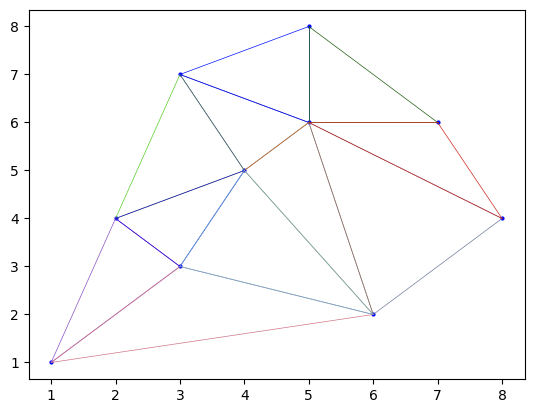

In [119]:
filePoints = np.genfromtxt("points.txt", delimiter=" ", usemask=True)
points = []
for p in filePoints:
    points.append(Point(p[0],p[1]))
    
for p in points:
    p.draw("b")
BowyerWatson(points)               